# Solutions of Written Assignment 4 of 2023

### Question 7

In [1]:
def dplot(f, x0):
    d1f(x) = derivative(f, x, 1)
    d2f(x) = derivative(f, x, 2)
    d3f(x) = derivative(f, x, 3)
    
    p0 = plot(f, (x, -x0, x0), linestyle = '-', color = 'blue', axes_labels = ['$x$', '$f(x)$'])
    p1 = plot(d1f(x), (x, -x0, x0), linestyle = ':', color = 'red', axes_labels = ['$x$', '$f\'(x)$'])
    p2 = plot(d2f(x), (x, -x0, x0), linestyle = '--', color = 'green', axes_labels = ['$x$', '$f\'\'(x)$'])
    p3 = plot(d3f(x), (x, -x0, x0), linestyle = '--', color = 'green', axes_labels = ['$x$', '$f\'\'\'(x)$'])
    g = graphics_array([[p0, p1], [p2, p3]])
    return g

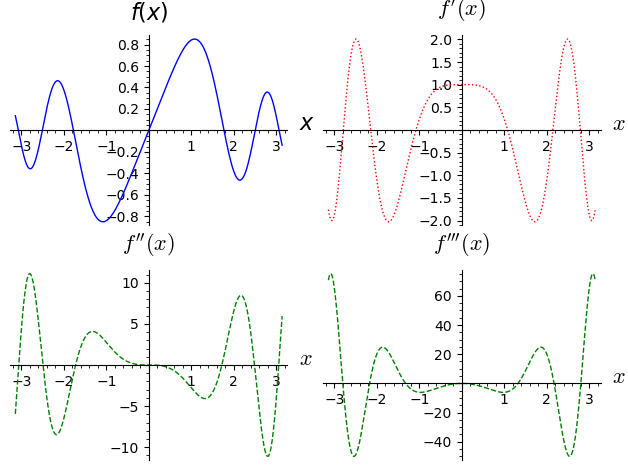

In [2]:
dplot(sin(x^2)/x, pi)

### Question 8

In [3]:
# Install the autograd packege if not installed already
try:
    import autograd
    print("Autograd is already installed.")
except:
    print("Installing autograd...")
    !pip install autograd

Autograd is already installed.


In [4]:
import autograd.numpy as np
from autograd import grad

def f(w):
    xx, yy = w
    if (xx^2 + yy^2 < 1):
        u = np.sin(xx*yy)
    else:
        u = np.sin(xx*yy)/np.sqrt(xx^2 + yy^2)
    return u

auto_grad = grad(f)

In [5]:
y = var('y')
af(x, y) = sin(x*y)*unit_step(1-x^2-y^2)+(sin(x*y)/sqrt(x^2+y^2))*unit_step(x^2+y^2-1)
analytic_grad(x, y) = af(x, y).gradient([x, y])

In [6]:
def randab(a, b):
    return (a-b)*random()+b

poi = [[n(randab(-pi, pi)), n(randab(-pi, pi))] for ii in range(10)]; poi

[[2.44852334011998, 1.74855325072487],
 [-1.60188472176393, -0.213343916597723],
 [0.0194939753712860, -0.173795436910522],
 [1.45716395114297, 0.339334043599593],
 [-1.65997674788579, -0.649517690648273],
 [2.87226633405172, -0.194354534128060],
 [2.66103411075642, -2.67831195179270],
 [3.00072979420070, 0.270931028304904],
 [-1.06225914411402, 0.415908687367907],
 [-0.0742468210047322, -2.13517299815474]]

In [7]:
nppoi = [np.array(xy) for xy in poi]

gf1 = [auto_grad(xy).tolist() for xy in nppoi]
gf2 = [list(analytic_grad(xy[0], xy[1])) for xy in poi]

In [8]:
def myn(w):
    x, y = w
    return (x.n(digits = 3), y.n(digits = 3))

for ii in range(10):
    print("point", ii, "             :", poi[ii])
    print("automatic grad:", gf1[ii])
    print("analytic grad  :", gf2[ii])
    print("Distance=", sqrt((gf1[ii][0] - gf2[ii][0])^2 + (gf1[ii][1] - gf2[ii][1])^2))

point 0              : [2.44852334011998, 1.74855325072487]
automatic grad: [-0.16112800134125094, -0.28167323214355383]
analytic grad  : [-0.161128001341251, -0.281673232143554]
Distance= 0
point 1              : [-1.60188472176393, -0.213343916597723]
automatic grad: [0.0028235150231863265, -0.9169806984054617]
analytic grad  : [0.00282351502318637, -0.916980698405461]
Distance= 2.25914017994151e-16
point 2              : [0.0194939753712860, -0.173795436910522]
automatic grad: [-0.17379443947340775, 0.01949386349254586]
analytic grad  : [-0.173794439473408, 0.0194938634925459]
Distance= 0
point 3              : [1.45716395114297, 0.339334043599593]
automatic grad: [-0.0068390207160785865, 0.8092012874950156]
analytic grad  : [-0.00683902071607861, 0.809201287495016]
Distance= 2.77555756156289e-17
point 4              : [-1.65997674788579, -0.649517690648273]
automatic grad: [0.08591200553605002, -0.3393714218548373]
analytic grad  : [0.0859120055360500, -0.339371421854837]
Distance=

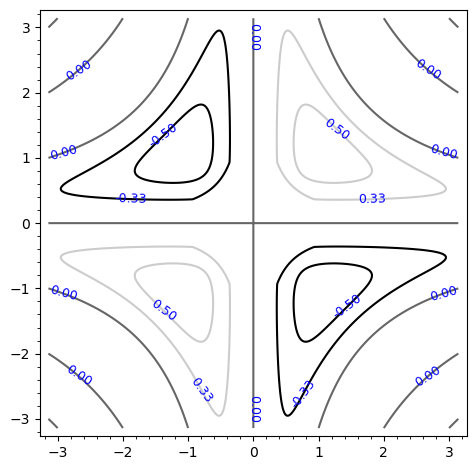

In [9]:
contour_plot(af(x, y), (x, -pi, pi), (y, -pi, pi), contours = [-1/2, -1/3, 0, 1/3, 1/2], fill = False, plot_points = 300, labels = True)

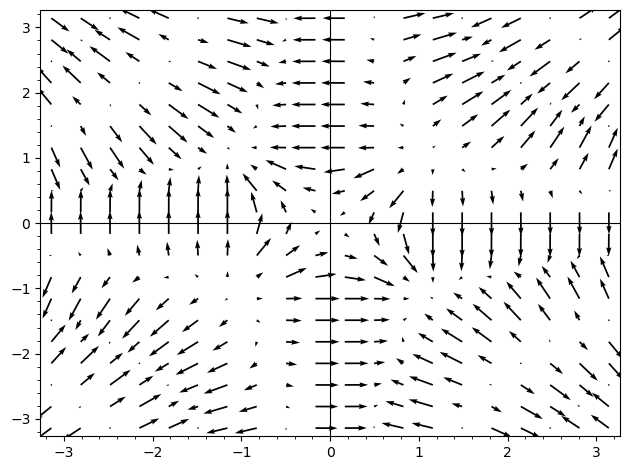

In [10]:
plot_vector_field(-analytic_grad(x, y), (x, -pi, pi), (y, -pi, pi))